<center>
<img src='https://papik.pro/uploads/posts/2022-01/1642322472_2-papik-pro-p-brevno-klipart-2.png' align='center' width="700x">
</center>

# Андан на экономе

## Семинар 9:  логистическая регрессия

Пришло время поговорить про классификацию. Мы уже знаем, как для классификации работает метод ближайших соседей. Давайте адаптируем под неё регрессию.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Логистическая регрессия

- __Регрессия:__ мы пытаемся предсказать действительное число

- __Классификация:__ мы пытаемся предсказать категорию (мы будем рассматривать ситуацию с двумя классами) 

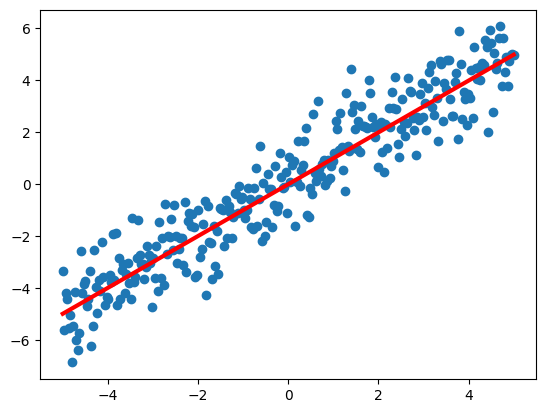

In [10]:
from sklearn.linear_model import LinearRegression

x = np.linspace(-5, 5, 300)
u = np.random.normal(size=300)
y = x + u

model = LinearRegression(fit_intercept=False)
model.fit(x.reshape(-1, 1),y)
model.coef_

xs = np.linspace(-5, 5, 100)
plt.plot(xs, model.coef_[0]*xs, color='red', lw=3)
plt.scatter(x,y);

В случае линейной регрессии всё было красиво. Переменная, которую мы прогнозировали, $y$, принимала любые значения и всё было хорошо. Теперь мы решаем задачу классификации. Наша переменная принимает значения либо $0$ либо $1$. Если мы опять будем строить обычную регрессию, мы попадём в глупую ситуацию.

In [11]:
y = 1*(y > 0)

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

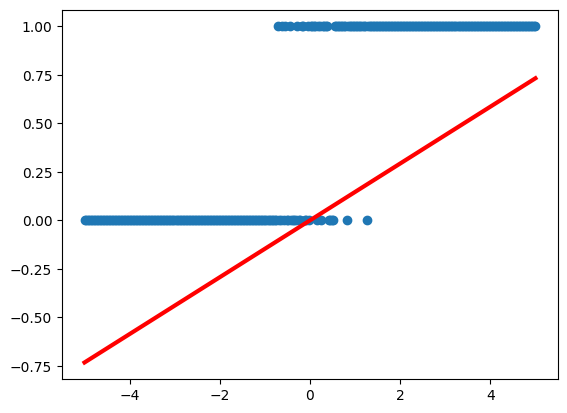

In [13]:
model = LinearRegression(fit_intercept=False)
model.fit(x.reshape(-1, 1), y)

xs = np.linspace(-5, 5, 100)
plt.plot(xs, model.coef_[0]*xs, color='red', lw=3)
plt.scatter(x,y);

Получилось странновато. Наша линия регрессии снова пройдёт через облако точек. Когда мы будем пытаться на её основе построить прогноз, мы будем получать абсолютно любые значения. Это могут быть и $−7$, и $2.1$, и $1$, и даже $0.33$.

В принципе, мы можем интерпретировать эти числа как уверенность нашей модели. Напри- мер, если получилось $55$, значит модель уверена в том, что класс первый. А если получилось $−33$, модель уверена, что класс нулевой. Ну а если $0.5$, то модель колеблется. Правда эту степень уверенности хорошо было бы пронормировать. Обычно это делают на отрезок от нуля до единицы и получившиеся числа интерпретируют как вероятности.

__Задание 1:__

Построй график функции $$f(t)= \frac{e^t}{1 + e^t} = \frac{1}{1 + exp(-t)}.$$

По графику ответь на вопросы:

- Монотонна ли функция?
- Чему равны её пределы справа и слева?
- Относительно какой точки симметричен график?
- Какие значения принимает функция при произвольных $t$?

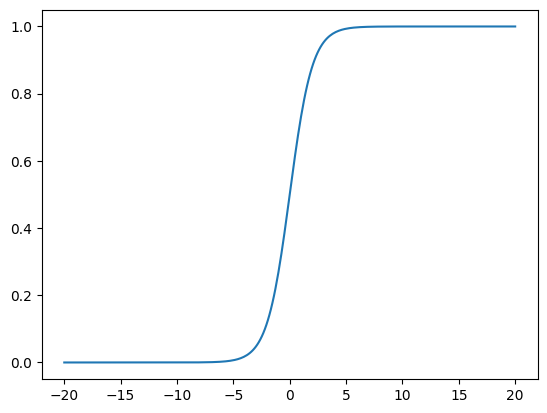

In [14]:
# ваш код 
xq = np.linspace(-20, 20, 300)
yq = 1/(1 + np.exp(-xq))

plt.plot(xq, yq);

Именно такую функцию нам хочется провести через наши точки, когда мы смотрим на график.

### Как выглядит модель:


- $x$ - регрессоры (объясняющие переменные)
- $y \in \{0,1\}$ - целевая переменная 

\begin{equation*}
\begin{aligned}
& z = w \cdot x \\
& P(y = 1 \mid x)  = \frac{e^{z}}{1 + e^{z}}
\end{aligned}
\end{equation*}

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e+10)
model.fit(x.reshape(-1, 1), y)
model.coef_

array([[2.58563153]])

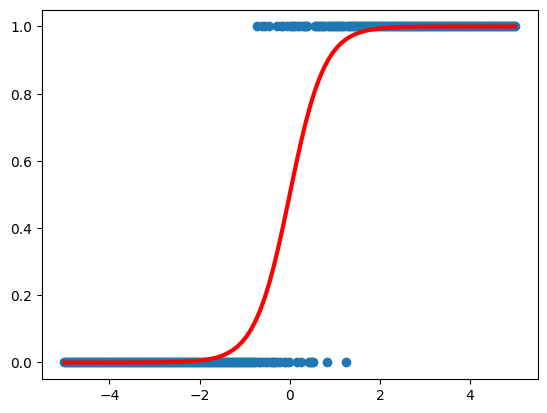

In [16]:
xs = np.linspace(-5, 5, 100)

sigm = lambda t: np.exp(t)/(1 + np.exp(t))

plt.plot(xs, sigm(model.coef_[0][0]*xs), color='red', lw=3)
plt.scatter(x,y);

### Как можно прогнозировать?

__Модель:__

\begin{equation*}
\begin{aligned}
& z = 0.5 \cdot x \\
& P(y = 1 \mid x)  = \frac{e^{z}}{1 + e^{z}}
\end{aligned}
\end{equation*}

Пусть у меня есть $x = 4$, построим прогноз:

$$
z = 0.5 \cdot 4 = 2
$$

$$
P(y = 1 \mid x) = \frac{e^{2}}{1 + e^{2}} = 0.88
$$

Как превратить уверенность модели в класс? Нужно выбрать порог и всё, что окажется выше него, объявить единицами. Обычно порог подбирают отталкиваясь от здравого смысла. Про это мы поговорим на следующем семенаре. 

In [17]:
x_new = np.array([-10, 1, 2, 3, 4])
x_new = x_new[:,None]
x_new

array([[-10],
       [  1],
       [  2],
       [  3],
       [  4]])

In [18]:
model.predict(x_new) # порог равен 0.5

array([0, 1, 1, 1, 1])

In [19]:
model.predict_proba(x_new) # вероятность нулевого и первого класса

array([[1.00000000e+00, 5.89854577e-12],
       [7.00688952e-02, 9.29931105e-01],
       [5.64534260e-03, 9.94354657e-01],
       [4.27600045e-04, 9.99572400e-01],
       [3.22317572e-05, 9.99967768e-01]])

In [20]:
p = model.predict_proba(x_new)
p.sum(axis=1) # в сумме по строкам получаем единицы

array([1., 1., 1., 1., 1.])

### А как эту модель оценить?

#### Вероятностный подход

Давайте выпишем правдоподобие!

$$
L(w) = P(y_1, y_2, \ldots, y_n \mid x, w) = P(y_1 \mid x, w) \cdot P(y_2 \mid x, w) \cdot \ldots \cdot P(y_n \mid x, w) \to \max_{w} 
$$

$$
P(y_1 \mid x, w) = \begin{cases} P(y = 1 \mid x),  & y_1 = 1 \\  1 - P(y = 1 \mid x),   & y_1 = 0  \end{cases} = \begin{cases} p(x_1),  & y_1 = 1 \\  1 - p(x_1),   & y_1 = 0  \end{cases} = \quad p(x_1)^{y_1} \cdot (1 - p(x_1))^{1 - y_1}
$$

$$
L(w) = \prod_{i=1}^n  p(x_i)^{y_i} \cdot (1 - p(x_i))^{1 - y_i}
$$

$$
\ln L(w) = \sum_{i=1}^n [y_i \cdot \ln p(x_i) + (1 - y_i)\cdot \ln (1 - p(x_i))] \to \max_w
$$

$$
logloss = \frac{-1}{n} \cdot \ln L(w) = -\frac{1}{n} \sum_{i=1}^n [y_i \cdot \ln p(x_i) + (1 - y_i)\cdot \ln (1 - p(x_i))] \to \min_{w}
$$

#### Инженерный способ

В случае регрессии мы использовали для оценки модели MSE. В случае логистической регрессии мы также можем попробовать использовать его же, но нам бы хотелось придумать что-то новое. Новая функция потерь должна подходить для нашей задачи по смыслу.

Наши y могут принимать значения $1$ и $0.$ Если $y = 1$, мы хотим, чтобы модель спрогнозировала $p(x) = P(y = 1 \mid x)$ побольше. Если $y = 0$, мы хотим, чтобы модель спрогнозировала $p(x)$ поменьше, то есть $1 − p(x)$ побольше.

Тогда мы можем выписать такую штуку:

$$
-\frac{1}{n} \sum_{i=1}^n \cdot [ y_i \cdot p(x_i)  + (1 - y_i) \cdot (1 - p(x_i))  ] \to \min
$$

Нам надо найти её минимум по весам модели. Если $y = 1$, мы будем получать большое $p(x)$, так ка второе слагаемое в нашей формуле будет зануляться. Если $y = 0$, то будет зануляться первое слагаемое, и мы будем пытаться получить большое $1 − p(x)$.

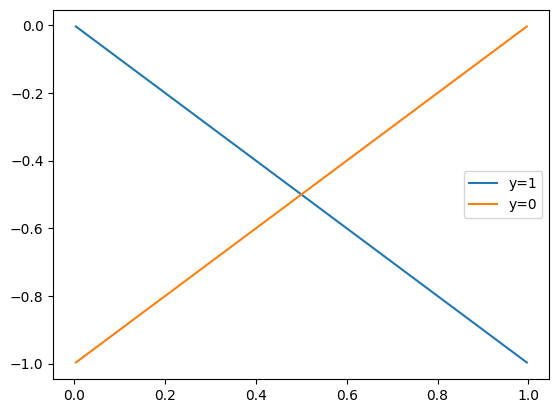

In [21]:
p = np.linspace(0,1,300)[1:-1]
plt.plot(p, -p, label='y=1')
plt.plot(p, -(1-p), label='y=0')
plt.legend();

Функция потерь почти готова. Остался последний штрих. Давайте заставим нашу функцию штрафовать нас при сильных ошибках сильнее, как это было в случае MSE для регрессии. Для этого нужно взять от p̂ логарифм и получить:


$$
logloss = -\frac{1}{n} \sum_{i=1}^n \cdot [y_i  \cdot \ln p(x_i) + (1 - y_i) \cdot \ln (1 - p(x_i))] \to \min
$$

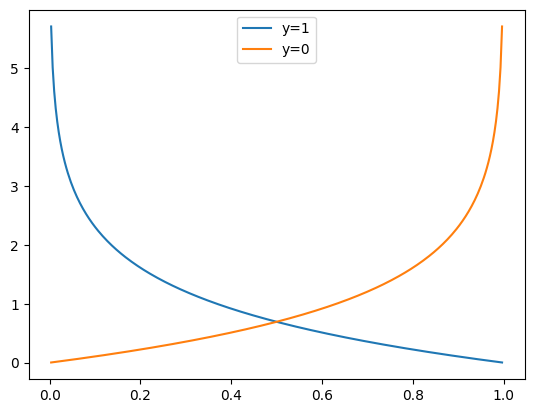

In [22]:
p = np.linspace(0,1,300)[1:-1]
plt.plot(p, -np.log(p), label='y=1')
plt.plot(p, -np.log(1-p), label='y=0')
plt.legend();

Это будет наша итоговая функция потерь. Она называется logloss и обычно используется для обучения логистической регрессии. К функции потерь можно добавить регуляризацию.

$$
Q(w) = -\frac{1}{n} \sum_{i=1}^n \cdot [y_i  \cdot \ln p(x_i) + (1 - y_i) \cdot \ln (1 - p(x_i))] + \frac{1}{C} \cdot \sum_{j=1}^k w_j^2 \to \min
$$

И практически никакой математики. Одна сплошная интуиция. На самом деле ровно такую же функцию потерь можно получить без интуиции с помощью метода максимального правдоподобия. Мы займёмся этим через семинар. 

В модели разобрались? Давайте теперь обучим что-нибудь.

## 2. Предсказание оттока

Иногда так бывает, что пользователи чёт приуныли. Когда пользователь приуныл, ему хочется свалить туда, где весело. Если он сваливает, это называется отток. Было бы круто спрогнозировать вероятность того, что пользователь собрался убежать и сделать жизни тех, у кого эта вероятность высокая чуть веселее. Тогда пользователь перестанет унывать и останется с нами. В качестве примера [возьмём телеком.](https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics)

In [24]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Описание переменных:** 

* `State` —	Буквенный код штата
* `Account length` — Как долго клиент обслуживается компанией
* `Area code` — Префикс номера телефона
* `International plan` — Международный роуминг (подключен/не подключен)
* `Voice mail plan` — Голосовая почта (подключена/не подключена)
* `Number vmail messages` — Количество голосовых сообщений
* `Total day minutes` — Общая длительность разговоров днем
* `Total day calls` — Общее количество звонков днем
* `Total day charge` — Общая сумма оплаты за услуги днем
* `Total eve minutes` — Общая длительность разговоров вечеромй
* `Total eve calls` — Общее количество звонков вечером
* `Total eve charge` — Общая сумма оплаты за услуги вечером
* `Total night minutes` — Общая длительность разговоров ночью
* `Total night calls` — Общее количество звонков ночью
* `Total night charge` — Общая сумма оплаты за услуги ночью
* `Total intl minutes` — Общая длительность международных разговоров
* `Total intl calls` — Общее количество международных разговоров
* `Total intl charge` — Общая сумма оплаты за международные разговоры
* `Customer service calls` — Число обращений в сервисный центр

**Целевая переменная:** `Churn` — Признак оттока, бинарный признак ($1$ – потеря клиента, то есть отток).


In [25]:
categorical_features = ['State', 'Area code', 'International plan', 'Voice mail plan']

numeric_features = [
    'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 
    'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes',
    'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 
    'Total intl charge', 'Customer service calls', 'Account length'
]

target = 'Churn'

Давайте посмотрим на распределение целевой переменной. В нём есть дисбаланс. Как думаете, почему это плохо?

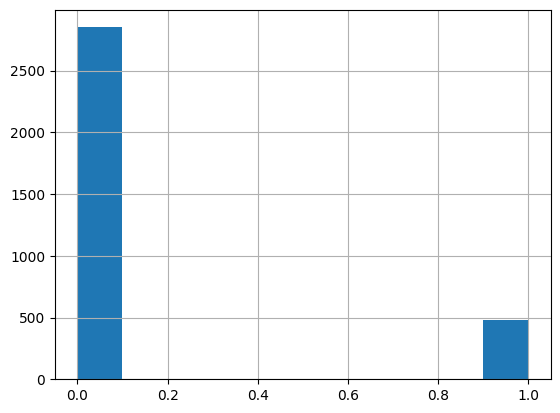

In [26]:
df[target].astype(int).hist();

__Задание 2:__

Сделайте предобработку данных. Заполните пропуски переменных. Посмотрите, есть ли в данных выбросы. Разбейте выборку на обучающую и тестовую. Нормализуйте непрерывные переменные. Сделайте для категориальных переменныз OHE. Избавьтесь от слишком редких категорий.

In [28]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

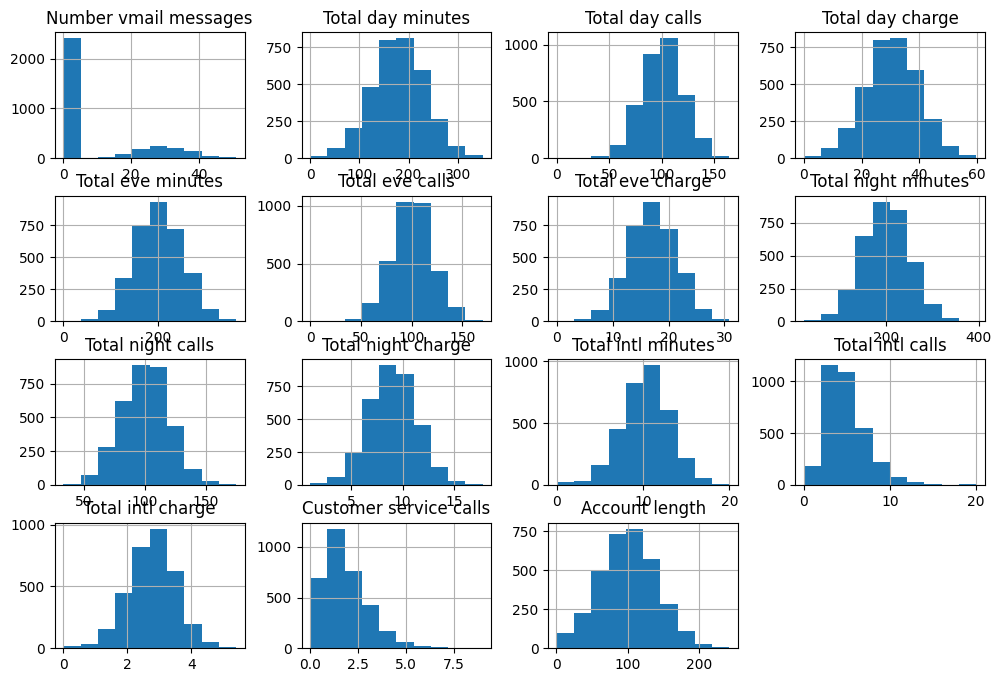

In [31]:
df[numeric_features].hist(figsize=(12,8));

In [32]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df[target])

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), numeric_features),    
    ('ohe', OneHotEncoder(handle_unknown="ignore", drop="first",
                         min_frequency=0.01), categorical_features)
])

column_transformer.fit_transform(df_train.drop(target, axis=1)).shape

(2666, 69)

In [35]:
X_train = df_train.drop(target, axis=1)
y_train = df_train[target]

X_test = df_test.drop(target, axis=1)
y_test = df_test[target]

__Задание 3:__ 

Давайте для тестовой выборки предскажем для всех наблюдений самый частый класс (наивный прогноз). Каким в таком случае получится качество модели? Для оценки качества используйте `accuracy_score` (долю правильных ответов).

In [37]:
from sklearn.metrics import accuracy_score

y_pred = np.zeros_like(y_test)
accuracy_score(y_pred, y_test)

0.8545727136431784

Значение доли правильных ответов получится довольно высоким. Как думаете, говорит ли это нам что-то об адекватности модели? 

__Задание 4:__ 

Обучите логистическую регрессию с регуляризацией и метод ближайших соседей. Для обоих алгоритмов с помощью перебора по решётке подберите оптимальные значения гиперпараметров. В качестве параметра `scoring` укажите `"roc_auc"` Измерьте качество обоих алгоритмов на тестовой выборке. Про roc-auc мы подробнее поговорим на следующем семинаре. Сейчас для нас важно то, что она принимает значения от $0.5$ до $1$. Чем она больше, тем лучше оказалась модель.

In [40]:
from sklearn.linear_model import LogisticRegression

pipiline_lr = Pipeline([
    ('transformer', column_transformer),
    ('lr', LogisticRegression())
])

pipiline_lr.fit(X_train, y_train)
y_pred = pipiline_lr.predict(X_test)

In [41]:
accuracy_score(y_pred, y_test)

0.8680659670164917

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'lr__C': np.logspace(-2, 4, 20)
}

searcher = GridSearchCV(
    pipiline_lr, params, scoring='roc_auc', cv=10, n_jobs=-1
)a

searcher.fit(X_train, y_train)

In [46]:
searcher.best_params_

{'lr__C': 0.18329807108324356}

Text(0, 0.5, 'CV score')

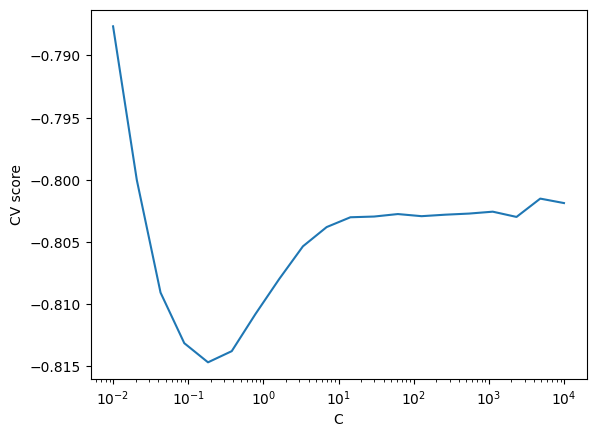

In [49]:
plt.plot(params['lr__C'], -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("CV score")

In [50]:
y_pred = searcher.predict(X_test)
accuracy_score(y_pred, y_test)

0.8665667166416792

In [51]:
searcher.predict_proba(X_test)

array([[0.98854976, 0.01145024],
       [0.88731157, 0.11268843],
       [0.83866435, 0.16133565],
       ...,
       [0.98303324, 0.01696676],
       [0.94554095, 0.05445905],
       [0.97676422, 0.02323578]])

__Задание 5:__ 

Измерьте качество обоих алгоритмов с помощью `roc_auc_score`. Обратите внимание, что на вход в эту метрику надо посылать вероятности.

In [ ]:
# ваш код 

Какой из алгоритмов оказался лучше? Запустите строки, написанные ниже. Они обучат нелинейный алгоритм, который называется случайный лес. Мы не рассматриваем его в нашем курсе, но он отрабатывает довольно мощно. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = Pipeline(steps=[
    ('oheand_scaling', column_transformer),
    ('rf', RandomForestClassifier(n_estimators=1000))
])

model_rf.fit(X_train, y_train)

p_pred = model_rf.predict_proba(X_test)
roc_auc_score(y_test, p_pred[:,-1])

Сможете побить качество случайного леса с помощью логистической регрессии? :) 

__Задание 6:__ объясните, почему на обложке этого семинара нарисовано бревно.